# Library Setup

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Data Setup

In [3]:
test_label_df = pd.read_csv("/content/drive/MyDrive/FP ML DM/Data/test_labels.csv")

# Skenario 1

In [4]:
train_df_1 = pd.read_csv("/content/drive/MyDrive/FP ML DM/Data/train_skenario1.csv")
test_df_1 = pd.read_csv("/content/drive/MyDrive/FP ML DM/Data/test_skenario1.csv")


In [5]:
feature_cols = [c for c in train_df_1.columns if c.startswith("embed_")]

X_train_1 = train_df_1[feature_cols].copy()
y_train_1 = train_df_1["label"].astype(str)
X_test_1 = test_df_1[feature_cols].copy()

## Skenario 2

In [6]:
train_df_2 = pd.read_csv("/content/drive/MyDrive/FP ML DM/Data/train_skenario2.csv")
test_df_2 = pd.read_csv("/content/drive/MyDrive/FP ML DM/Data/test_skenario2.csv",sep=';')

In [7]:
feature_cols = [c for c in train_df_2.columns if c.startswith("embed_")]

X_train_2= train_df_1[feature_cols].copy()
y_train_2 = train_df_1["label"].astype(str)
X_test_2 = test_df_1[feature_cols].copy()

# Skenario 3


In [8]:
train_df_3= pd.read_csv("/content/drive/MyDrive/FP ML DM/Data/train_skenario3.csv")
test_df_3 = pd.read_csv("/content/drive/MyDrive/FP ML DM/Data/test_skenario3.csv")

In [9]:
feature_cols = [c for c in train_df_3.columns if c.startswith("embed_")]

X_train_3 = train_df_3[feature_cols].copy()
y_train_3 = train_df_3["label"].astype(str)
X_test_3 = test_df_3[feature_cols].copy()

## Skenario 4

In [10]:
train_df_4= pd.read_csv("/content/drive/MyDrive/FP ML DM/Data/train_skenario4.csv")
test_df_4 = pd.read_csv("/content/drive/MyDrive/FP ML DM/Data/test_skenario4.csv", sep=";")

In [11]:
feature_cols = [c for c in train_df_4.columns if c.startswith("embed_")]

X_train_4 = train_df_4[feature_cols].copy()
y_train_4 = train_df_4["label"].astype(str)
X_test_4 = test_df_4[feature_cols].copy()

# Preprocess

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

label_encoder = LabelEncoder()
scaler = StandardScaler()
fs = SelectKBest(score_func=f_classif, k=200)

all_unique_labels = pd.concat([
    train_df_1["label"].astype(str),
    train_df_2["label"].astype(str),
    train_df_3["label"].astype(str),
    train_df_4["label"].astype(str),
    test_label_df["label"].astype(str)
]).unique()

label_encoder.fit(all_unique_labels)

LabelEncoder()

## Skenario 1

In [13]:
for col in feature_cols:
    X_train_1[col] = X_train_1[col].astype(str).str.replace(',', '.', regex=False).astype(float)
    X_test_1[col] = X_test_1[col].astype(str).str.replace(',', '.', regex=False).astype(float)

y_train_1_str = train_df_1["label"].astype(str) # Get original string labels
y_train_1 = label_encoder.transform(y_train_1_str)
X_train_scaled_1 = scaler.fit_transform(X_train_1)
X_test_scaled_1 = scaler.transform(X_test_1)
X_train_fs1= fs.fit_transform(X_train_scaled_1, y_train_1)
X_test_fs1 = fs.transform(X_test_scaled_1)

In [14]:
n_classes = len(np.unique(y_train_1))
lda = LDA(n_components=n_classes - 1)

X_train_lda_1 = lda.fit_transform(X_train_fs1, y_train_1)
X_test_lda_1 = lda.transform(X_test_fs1)

## Skenario 2

In [15]:
y_train_2_original_strings = train_df_2["label"].astype(str)
y_train_2 = label_encoder.transform(y_train_2_original_strings)
X_train_scaled_2 = scaler.fit_transform(X_train_2)
X_test_scaled_2 = scaler.transform(X_test_2)
X_train_fs2 = fs.fit_transform(X_train_scaled_2, y_train_2)
X_test_fs2 = fs.transform(X_test_scaled_2)

In [16]:
n_classes = len(np.unique(y_train_2))
lda = LDA(n_components=n_classes - 1)

X_train_lda_2 = lda.fit_transform(X_train_fs2, y_train_2)
X_test_lda_2 = lda.transform(X_test_fs2)

## Skenario 3

In [17]:
y_train_3_original_strings = train_df_3["label"].astype(str)
y_train_3 = label_encoder.transform(y_train_3_original_strings)
X_train_scaled_3 = scaler.fit_transform(X_train_3)
X_test_scaled_3 = scaler.transform(X_test_3)
X_train_fs3 = fs.fit_transform(X_train_scaled_3, y_train_3)
X_test_fs3 = fs.transform(X_test_scaled_3)

In [18]:
n_classes = len(np.unique(y_train_3))
lda = LDA(n_components=n_classes - 1)

X_train_lda_3 = lda.fit_transform(X_train_fs3, y_train_3)
X_test_lda_3 = lda.transform(X_test_fs3)

## Skenario 4

In [19]:
y_train_4_original_strings = train_df_4["label"].astype(str)
y_train_4 = label_encoder.transform(y_train_4_original_strings)
X_train_scaled_4 = scaler.fit_transform(X_train_4)
X_test_scaled_4 = scaler.transform(X_test_4)
X_train_fs4 = fs.fit_transform(X_train_scaled_4, y_train_4)
X_test_fs4 = fs.transform(X_test_scaled_4)

In [20]:
n_classes = len(np.unique(y_train_4))
lda = LDA(n_components=n_classes - 1)

X_train_lda_4 = lda.fit_transform(X_train_fs4, y_train_4)
X_test_lda_4 = lda.transform(X_test_fs4)

# Model

In [21]:
search_spaces = {
    "XGBoost": {
        "model": XGBClassifier(eval_metric="mlogloss"),
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [4, 6, 8],
            "learning_rate": [0.01, 0.05, 0.1],
            "subsample": [0.7, 0.9, 1.0],
            "colsample_bytree": [0.7, 0.8, 1.0]
        }
    },
    "LightGBM": {
        "model": LGBMClassifier(),
        "params": {
            "n_estimators": [200, 300, 500],
            "learning_rate": [0.01, 0.05, 0.1],
            "num_leaves": [31, 40, 60]
        }
    },
    "CatBoost": {
        "model": CatBoostClassifier(verbose=0),
        "params": {
            "iterations": [200, 300, 500],
            "learning_rate": [0.01, 0.05, 0.1],
            "depth": [4, 6, 8]
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [200, 300, 500],
            "max_depth": [10, 20, 30]
        }
    },
    "SVM (RBF)": {
        "model": SVC(),
        "params": {
            "C": [1, 5, 10, 20],
            "gamma": ["scale", "auto"],
            "kernel": ["rbf"]
        }
    }
}

# Parameter Tuning

## Skenario 1

In [22]:
best_models = {}

for name, model_data in search_spaces.items():
    print(f"\n TUNING MODEL: {name} ...")

    model = model_data["model"]
    params = model_data["params"]

    search = RandomizedSearchCV(
        model,
        params,
        n_iter=10,
        scoring="f1_macro",
        cv=3,
        verbose=1,
        n_jobs=-1
    )

    search.fit(X_train_lda_1, y_train_1)
    best_models[name] = search.best_estimator_

    print(f"BEST PARAMS for {name}: {search.best_params_}")

    # SAVE BEST MODEL
    joblib.dump(search.best_estimator_, f"best_model_{name}.pkl")
    print(f"Saved: best_model_{name}.pkl")


 TUNING MODEL: XGBoost ...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
BEST PARAMS for XGBoost: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Saved: best_model_XGBoost.pkl

 TUNING MODEL: LightGBM ...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1276, number of used features: 4
[LightGBM] [Info] Start training from score -2.861026
[LightGBM] [Info] Start training from score -2.720669
[LightGBM] [Info] Start training from score -1.229907
[LightGBM] [Info] Start training from score -1.120800
[LightGBM] [Info] Start training from score -1.352393
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


BEST PARAMS for RandomForest: {'n_estimators': 200, 'max_depth': 10}
Saved: best_model_RandomForest.pkl

 TUNING MODEL: SVM (RBF) ...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


BEST PARAMS for SVM (RBF): {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Saved: best_model_SVM (RBF).pkl



Evaluating XGBoost on TEST SET...
Accuracy: 0.8429 | F1 macro: 0.8393


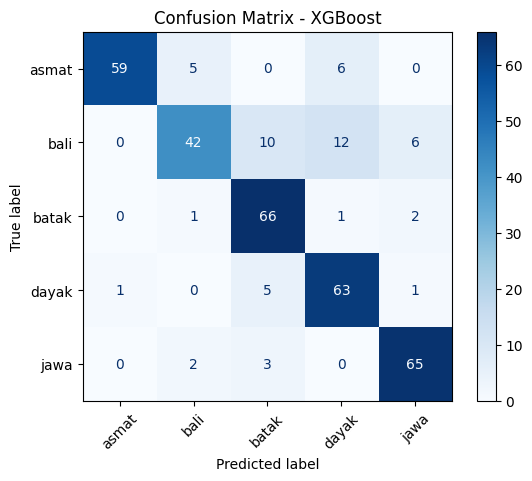

Accuracy class asmat: 0.8429
Accuracy class bali: 0.6000
Accuracy class batak: 0.9429
Accuracy class dayak: 0.9000
Accuracy class jawa: 0.9286
Wrong predictions saved: wrong_predictions_XGBoost.csv
Total salah: 55

Suku paling banyak BENAR diprediksi:
label
batak    66
jawa     65
dayak    63
asmat    59
bali     42
Name: count, dtype: int64

Evaluating LightGBM on TEST SET...
Accuracy: 0.8714 | F1 macro: 0.8702


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


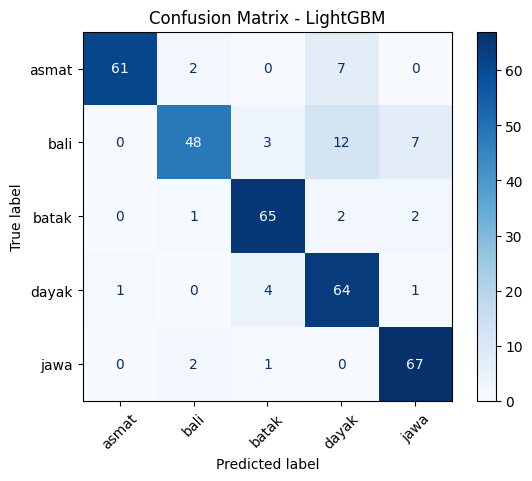

Accuracy class asmat: 0.8714
Accuracy class bali: 0.6857
Accuracy class batak: 0.9286
Accuracy class dayak: 0.9143
Accuracy class jawa: 0.9571
Wrong predictions saved: wrong_predictions_LightGBM.csv
Total salah: 45

Suku paling banyak BENAR diprediksi:
label
jawa     67
batak    65
dayak    64
asmat    61
bali     48
Name: count, dtype: int64

Evaluating CatBoost on TEST SET...
Accuracy: 0.8800 | F1 macro: 0.8795


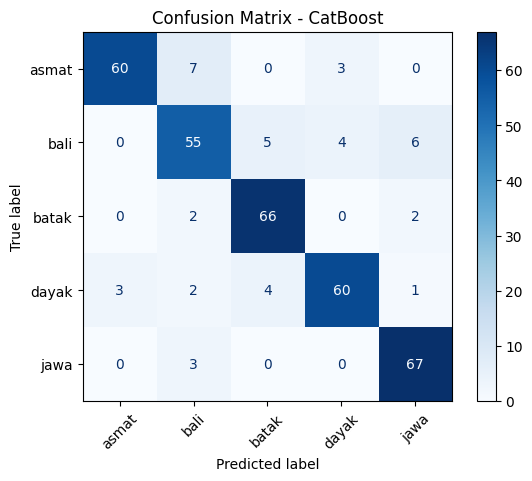

Accuracy class asmat: 0.8571
Accuracy class bali: 0.7857
Accuracy class batak: 0.9429
Accuracy class dayak: 0.8571
Accuracy class jawa: 0.9571
Wrong predictions saved: wrong_predictions_CatBoost.csv
Total salah: 42

Suku paling banyak BENAR diprediksi:
label
jawa     67
batak    66
asmat    60
dayak    60
bali     55
Name: count, dtype: int64

Evaluating RandomForest on TEST SET...
Accuracy: 0.8514 | F1 macro: 0.8469


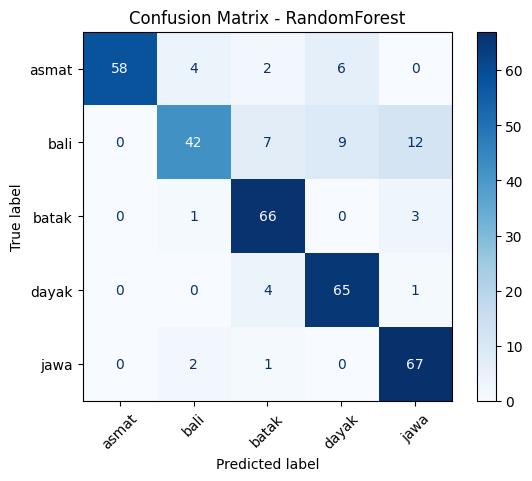

Accuracy class asmat: 0.8286
Accuracy class bali: 0.6000
Accuracy class batak: 0.9429
Accuracy class dayak: 0.9286
Accuracy class jawa: 0.9571
Wrong predictions saved: wrong_predictions_RandomForest.csv
Total salah: 52

Suku paling banyak BENAR diprediksi:
label
jawa     67
batak    66
dayak    65
asmat    58
bali     42
Name: count, dtype: int64

Evaluating SVM (RBF) on TEST SET...
Accuracy: 0.8657 | F1 macro: 0.8620


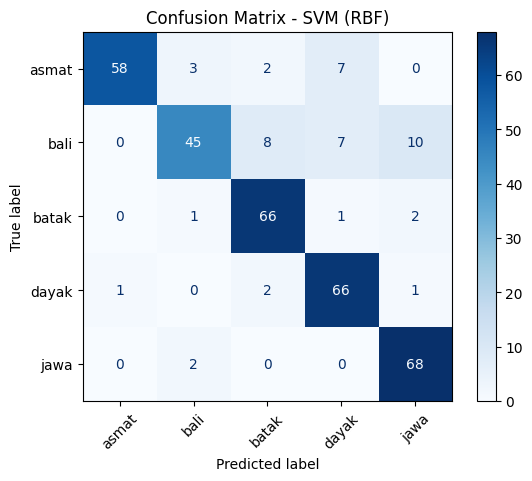

Accuracy class asmat: 0.8286
Accuracy class bali: 0.6429
Accuracy class batak: 0.9429
Accuracy class dayak: 0.9429
Accuracy class jawa: 0.9714
Wrong predictions saved: wrong_predictions_SVM (RBF).csv
Total salah: 47

Suku paling banyak BENAR diprediksi:
label
jawa     68
dayak    66
batak    66
asmat    58
bali     45
Name: count, dtype: int64


In [23]:
def normalize_id(x):
    # Remove '.jpg' extension and then convert to int
    return int(x.replace(".jpg", "").split("_")[-1])

results_1 = []

# Normalize id
test_df_1["id_norm"] = test_df_1["id"].apply(normalize_id)
test_label_df["id_norm"] = test_label_df["filename"].apply(normalize_id)

for name, model in best_models.items():
    print(f"\nEvaluating {name} on TEST SET...")

    # Predict
    pred = model.predict(X_test_lda_1).flatten()
    merged = pd.DataFrame({
        "id": test_df_1["id"],
        "pred": pred,
        "id_norm": test_df_1["id_norm"]
    }).merge(
        test_label_df[["filename", "label", "id_norm"]],
        on="id_norm",
        how="inner",
        suffixes=('_pred', '_true')
    )

    # Encode true label
    true_labels_encoded = label_encoder.transform(merged["label"])

    # Metrics
    acc = accuracy_score(true_labels_encoded, merged["pred"])
    f1 = f1_score(true_labels_encoded, merged["pred"], average="macro")
    print(f"Accuracy: {acc:.4f} | F1 macro: {f1:.4f}")


    # Confusion Matrix
    cm = confusion_matrix(true_labels_encoded, merged["pred"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Akurasi per kelas

    class_acc = cm.diagonal() / cm.sum(axis=1)
    for cls, acc_cls in zip(label_encoder.classes_, class_acc):
        print(f"Accuracy class {cls}: {acc_cls:.4f}")

    # Wrong predictions
    wrong_idx = np.where(true_labels_encoded != merged["pred"])[0]
    wrong_df = pd.DataFrame({
        "id_pred_file": merged.loc[wrong_idx, "id"],
        "id_true_file": merged.loc[wrong_idx, "filename"],
        "true_label": merged.loc[wrong_idx, "label"],
        "true_label_encoded": true_labels_encoded[wrong_idx],
        "predicted_label_encoded": merged.loc[wrong_idx, "pred"],
        "predicted_label": label_encoder.inverse_transform(merged.loc[wrong_idx, "pred"])
    })

    wrong_path = f"wrong_predictions_{name}.csv"
    wrong_df.to_csv(wrong_path, index=False)
    print(f"Wrong predictions saved: {wrong_path}")
    print(f"Total salah: {len(wrong_df)}")

    # Correct predictions
    correct_idx = np.where(true_labels_encoded == merged["pred"])[0]
    correct_df = pd.DataFrame({
        "label": merged.loc[correct_idx, "label"]
    })
    correct_counts = correct_df["label"].value_counts()
    print("\nSuku paling banyak BENAR diprediksi:")
    print(correct_counts.head())

    # Save results
    results_1.append((name, acc, f1))

In [24]:
print("\n SUMMARY PERFORMANCE Skenario 1")
for name, acc, f1 in results_1:
    print(f"{name:15s} | ACC: {acc:.4f} | F1: {f1:.4f}")


 SUMMARY PERFORMANCE Skenario 1
XGBoost         | ACC: 0.8429 | F1: 0.8393
LightGBM        | ACC: 0.8714 | F1: 0.8702
CatBoost        | ACC: 0.8800 | F1: 0.8795
RandomForest    | ACC: 0.8514 | F1: 0.8469
SVM (RBF)       | ACC: 0.8657 | F1: 0.8620


## Skenario 2

In [25]:
best_models_2 = {}

for name, model_data in search_spaces.items():
    print(f"\n TUNING MODEL: {name} ...")

    model = model_data["model"]
    params = model_data["params"]

    search = RandomizedSearchCV(
        model,
        params,
        n_iter=10,
        scoring="f1_macro",
        cv=3,
        verbose=1,
        n_jobs=-1
    )

    search.fit(X_train_lda_2, y_train_2)
    best_models_2[name] = search.best_estimator_

    print(f"BEST PARAMS for {name}: {search.best_params_}")

    # SAVE BEST MODEL
    joblib.dump(search.best_estimator_, f"best_model_{name}_skenario2.pkl")
    print(f"Saved: best_model_{name}_skenario2.pkl")


 TUNING MODEL: XGBoost ...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
BEST PARAMS for XGBoost: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Saved: best_model_XGBoost_skenario2.pkl

 TUNING MODEL: LightGBM ...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1276, number of used features: 4
[LightGBM] [Info] Start training from score -2.861026
[LightGBM] [Info] Start training from score -2.720669
[LightGBM] [Info] Start training from score -1.229907
[LightGBM] [Info] Start training from score -1.120800
[LightGBM] [Info] Start training from score -1.352393
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


BEST PARAMS for RandomForest: {'n_estimators': 500, 'max_depth': 10}
Saved: best_model_RandomForest_skenario2.pkl

 TUNING MODEL: SVM (RBF) ...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


BEST PARAMS for SVM (RBF): {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Saved: best_model_SVM (RBF)_skenario2.pkl



Evaluating XGBoost on test set...
Accuracy: 0.8429 | F1 macro: 0.8403


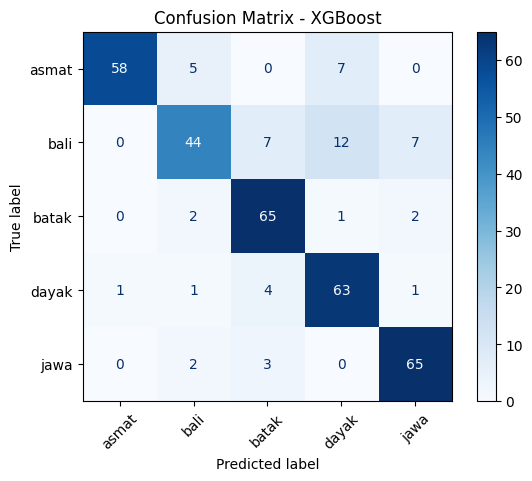

Accuracy class asmat: 0.8286
Accuracy class bali: 0.6286
Accuracy class batak: 0.9286
Accuracy class dayak: 0.9000
Accuracy class jawa: 0.9286
Wrong predictions saved: wrong_predictions_XGBoost_skenario2.csv
Total salah: 55

Suku paling banyak BENAR diprediksi:
label
batak    65
jawa     65
dayak    63
asmat    58
bali     44
Name: count, dtype: int64

Evaluating LightGBM on test set...
Accuracy: 0.8714 | F1 macro: 0.8702


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


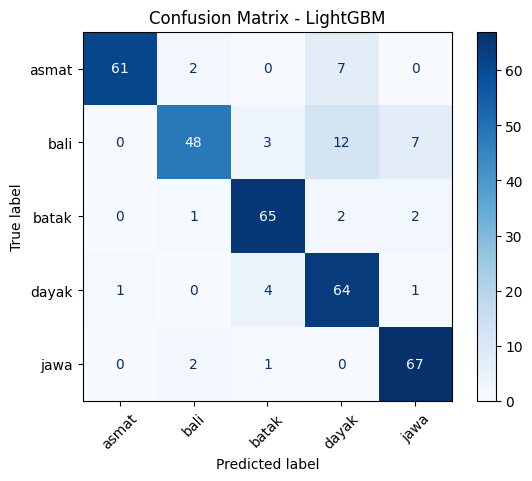

Accuracy class asmat: 0.8714
Accuracy class bali: 0.6857
Accuracy class batak: 0.9286
Accuracy class dayak: 0.9143
Accuracy class jawa: 0.9571
Wrong predictions saved: wrong_predictions_LightGBM_skenario2.csv
Total salah: 45

Suku paling banyak BENAR diprediksi:
label
jawa     67
batak    65
dayak    64
asmat    61
bali     48
Name: count, dtype: int64

Evaluating CatBoost on test set...
Accuracy: 0.8914 | F1 macro: 0.8908


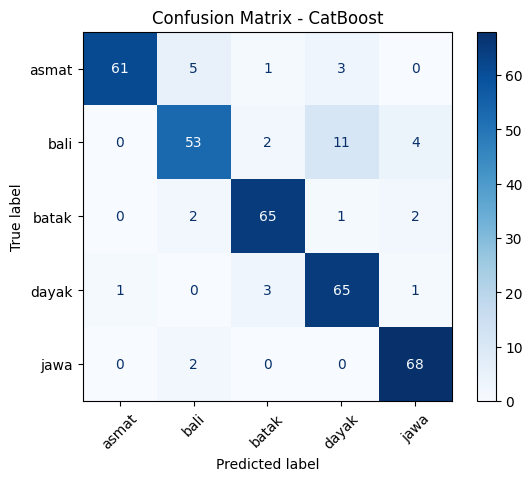

Accuracy class asmat: 0.8714
Accuracy class bali: 0.7571
Accuracy class batak: 0.9286
Accuracy class dayak: 0.9286
Accuracy class jawa: 0.9714
Wrong predictions saved: wrong_predictions_CatBoost_skenario2.csv
Total salah: 38

Suku paling banyak BENAR diprediksi:
label
jawa     68
dayak    65
batak    65
asmat    61
bali     53
Name: count, dtype: int64

Evaluating RandomForest on test set...
Accuracy: 0.8486 | F1 macro: 0.8436


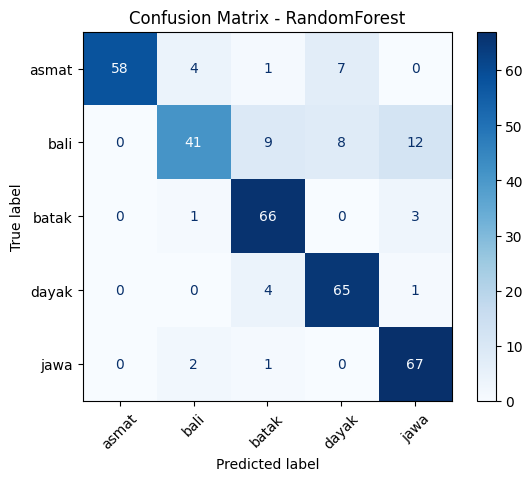

Accuracy class asmat: 0.8286
Accuracy class bali: 0.5857
Accuracy class batak: 0.9429
Accuracy class dayak: 0.9286
Accuracy class jawa: 0.9571
Wrong predictions saved: wrong_predictions_RandomForest_skenario2.csv
Total salah: 53

Suku paling banyak BENAR diprediksi:
label
jawa     67
batak    66
dayak    65
asmat    58
bali     41
Name: count, dtype: int64

Evaluating SVM (RBF) on test set...
Accuracy: 0.8657 | F1 macro: 0.8620


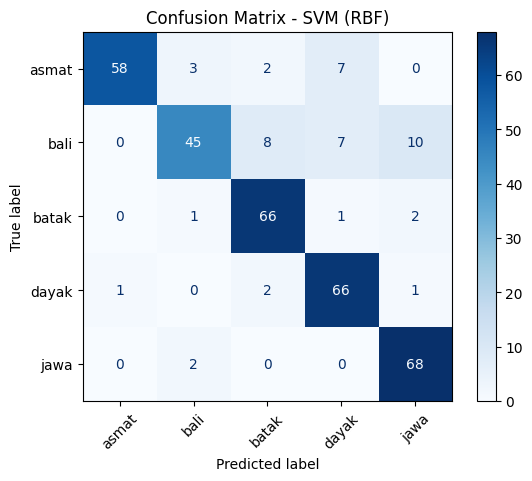

Accuracy class asmat: 0.8286
Accuracy class bali: 0.6429
Accuracy class batak: 0.9429
Accuracy class dayak: 0.9429
Accuracy class jawa: 0.9714
Wrong predictions saved: wrong_predictions_SVM (RBF)_skenario2.csv
Total salah: 47

Suku paling banyak BENAR diprediksi:
label
jawa     68
dayak    66
batak    66
asmat    58
bali     45
Name: count, dtype: int64


In [26]:
def normalize_id(x):
    # Remove '.jpg' extension and then convert to int
    return int(x.replace(".jpg", "").split("_")[-1])

results_2 = []

# Normalize id
test_df_2["id_norm"] = test_df_2["id"].apply(normalize_id)
test_label_df["id_norm"] = test_label_df["filename"].apply(normalize_id) # Fixed: Changed 'id' to 'filename'

for name, model in best_models_2.items():
    print(f"\nEvaluating {name} on test set...")

    # Predict
    pred = model.predict(X_test_lda_2).flatten()

    # Merge
    merged = pd.DataFrame({
        "id": test_df_2["id"],
        "pred": pred,
        "id_norm": test_df_2["id_norm"]
    }).merge(
        test_label_df[["filename", "label", "id_norm"]],
        on="id_norm",
        how="inner",
        suffixes=('_pred', '_true')
    )

    # Encode true label
    true_labels_encoded = label_encoder.transform(merged["label"])

    # Metrics
    acc = accuracy_score(true_labels_encoded, merged["pred"])
    f1 = f1_score(true_labels_encoded, merged["pred"], average="macro")
    print(f"Accuracy: {acc:.4f} | F1 macro: {f1:.4f}")

    # Confusion Matriks
    cm = confusion_matrix(true_labels_encoded, merged["pred"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    class_acc = cm.diagonal() / cm.sum(axis=1)
    for cls, acc_cls in zip(label_encoder.classes_, class_acc):
        print(f"Accuracy class {cls}: {acc_cls:.4f}")

    # Wrong predictions
    wrong_idx = np.where(true_labels_encoded != merged["pred"])[0]
    wrong_df = pd.DataFrame({
        "id_pred_file": merged.loc[wrong_idx, "id"],
        "id_true_file": merged.loc[wrong_idx, "filename"],
        "true_label": merged.loc[wrong_idx, "label"],
        "true_label_encoded": true_labels_encoded[wrong_idx],
        "predicted_label_encoded": merged.loc[wrong_idx, "pred"],
        "predicted_label": label_encoder.inverse_transform(merged.loc[wrong_idx, "pred"])
    })

    wrong_path = f"wrong_predictions_{name}_skenario2.csv"
    wrong_df.to_csv(wrong_path, index=False)
    print(f"Wrong predictions saved: {wrong_path}")
    print(f"Total salah: {len(wrong_df)}")

    # Correct predictions
    correct_idx = np.where(true_labels_encoded == merged["pred"])[0]
    correct_df = pd.DataFrame({
        "label": merged.loc[correct_idx, "label"]
    })
    correct_counts = correct_df["label"].value_counts()
    print("\nSuku paling banyak BENAR diprediksi:")
    print(correct_counts.head())

    # Save results
    results_2.append((name, acc, f1))

In [27]:
print("\n SUMMARY PERFORMANCE Skenario 2")
for name, acc, f1 in results_2:
    print(f"{name:15s} | ACC: {acc:.4f} | F1: {f1:.4f}")


 SUMMARY PERFORMANCE Skenario 2
XGBoost         | ACC: 0.8429 | F1: 0.8403
LightGBM        | ACC: 0.8714 | F1: 0.8702
CatBoost        | ACC: 0.8914 | F1: 0.8908
RandomForest    | ACC: 0.8486 | F1: 0.8436
SVM (RBF)       | ACC: 0.8657 | F1: 0.8620


## Skenario 3

In [28]:
best_models_3 = {}

for name, model_data in search_spaces.items():
    print(f"\n TUNING MODEL: {name} ...")

    model = model_data["model"]
    params = model_data["params"]

    search = RandomizedSearchCV(
        model,
        params,
        n_iter=10,
        scoring="f1_macro",
        cv=3,
        verbose=1,
        n_jobs=-1
    )

    search.fit(X_train_lda_3, y_train_3)
    best_models_3[name] = search.best_estimator_

    print(f"BEST PARAMS for {name}: {search.best_params_}")

    # SAVE BEST MODEL
    joblib.dump(search.best_estimator_, f"best_model_{name}_skenario3.pkl")
    print(f"Saved: best_model_{name}_skenario3.pkl")


 TUNING MODEL: XGBoost ...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
BEST PARAMS for XGBoost: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Saved: best_model_XGBoost_skenario3.pkl

 TUNING MODEL: LightGBM ...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1776, number of used features: 4
[LightGBM] [Info] Start training from score -1.704467
[LightGBM] [Info] Start training from score -1.670978
[LightGBM] [Info] Start training from score -1.560541
[LightGBM] [Info] Start training from score -1.451434
[LightGBM] [Info] Start training from score -1.683026
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


BEST PARAMS for RandomForest: {'n_estimators': 200, 'max_depth': 20}
Saved: best_model_RandomForest_skenario3.pkl

 TUNING MODEL: SVM (RBF) ...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


BEST PARAMS for SVM (RBF): {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Saved: best_model_SVM (RBF)_skenario3.pkl



Evaluating XGBoost on test set...
Accuracy: 0.8686 | F1 macro: 0.8672


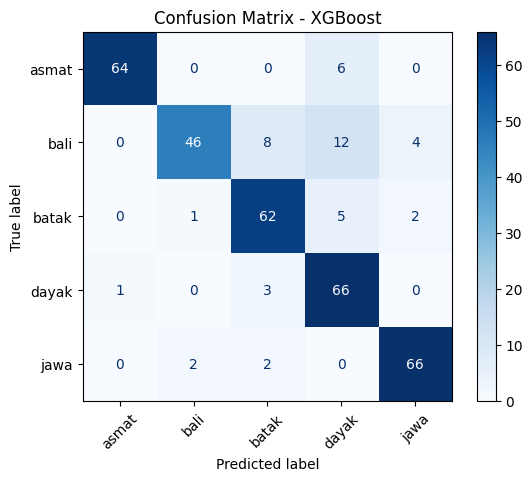

Accuracy class asmat: 0.9143
Accuracy class bali: 0.6571
Accuracy class batak: 0.8857
Accuracy class dayak: 0.9429
Accuracy class jawa: 0.9429
Wrong predictions saved: wrong_predictions_XGBoost_skenario3.csv
Total salah: 46

Suku paling banyak BENAR diprediksi:
label
jawa     66
dayak    66
asmat    64
batak    62
bali     46
Name: count, dtype: int64

Evaluating LightGBM on test set...
Accuracy: 0.8800 | F1 macro: 0.8805


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


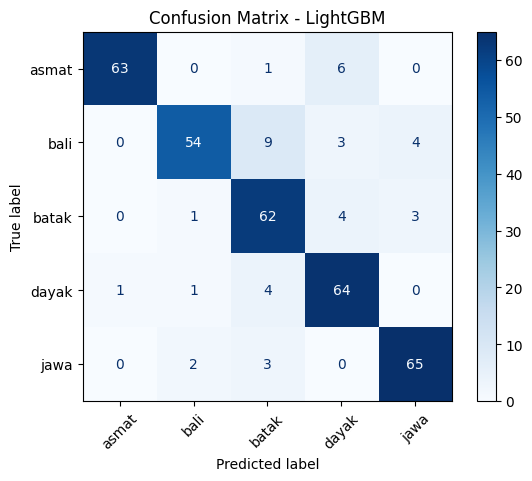

Accuracy class asmat: 0.9000
Accuracy class bali: 0.7714
Accuracy class batak: 0.8857
Accuracy class dayak: 0.9143
Accuracy class jawa: 0.9286
Wrong predictions saved: wrong_predictions_LightGBM_skenario3.csv
Total salah: 42

Suku paling banyak BENAR diprediksi:
label
jawa     65
dayak    64
asmat    63
batak    62
bali     54
Name: count, dtype: int64

Evaluating CatBoost on test set...
Accuracy: 0.8857 | F1 macro: 0.8853


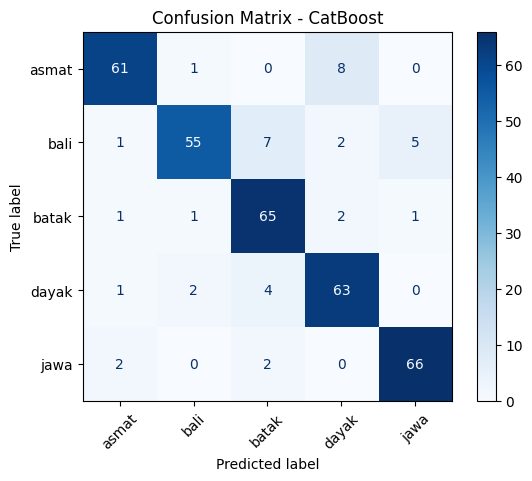

Accuracy class asmat: 0.8714
Accuracy class bali: 0.7857
Accuracy class batak: 0.9286
Accuracy class dayak: 0.9000
Accuracy class jawa: 0.9429
Wrong predictions saved: wrong_predictions_CatBoost_skenario3.csv
Total salah: 40

Suku paling banyak BENAR diprediksi:
label
jawa     66
batak    65
dayak    63
asmat    61
bali     55
Name: count, dtype: int64

Evaluating RandomForest on test set...
Accuracy: 0.8571 | F1 macro: 0.8556


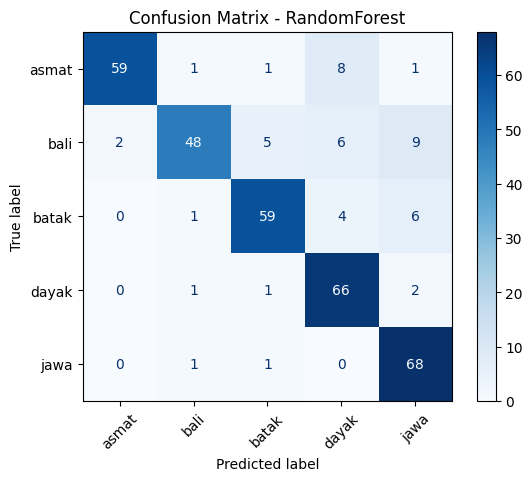

Accuracy class asmat: 0.8429
Accuracy class bali: 0.6857
Accuracy class batak: 0.8429
Accuracy class dayak: 0.9429
Accuracy class jawa: 0.9714
Wrong predictions saved: wrong_predictions_RandomForest_skenario3.csv
Total salah: 50

Suku paling banyak BENAR diprediksi:
label
jawa     68
dayak    66
asmat    59
batak    59
bali     48
Name: count, dtype: int64

Evaluating SVM (RBF) on test set...
Accuracy: 0.8800 | F1 macro: 0.8798


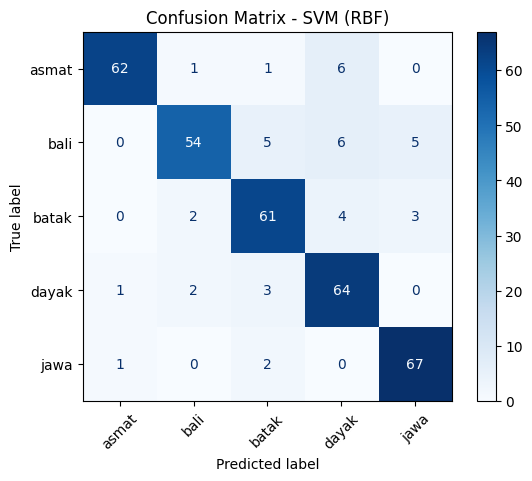

Accuracy class asmat: 0.8857
Accuracy class bali: 0.7714
Accuracy class batak: 0.8714
Accuracy class dayak: 0.9143
Accuracy class jawa: 0.9571
Wrong predictions saved: wrong_predictions_SVM (RBF)_skenario3.csv
Total salah: 42

Suku paling banyak BENAR diprediksi:
label
jawa     67
dayak    64
asmat    62
batak    61
bali     54
Name: count, dtype: int64


In [29]:
def normalize_id(x):
    # Remove '.jpg' extension and then convert to int
    return int(x.replace(".jpg", "").split("_")[-1])

results_3 = []

# Normalize id
test_df_3["id_norm"] = test_df_3["id"].apply(normalize_id)
test_label_df["id_norm"] = test_label_df["filename"].apply(normalize_id) # Fixed: Changed 'id' to 'filename'

for name, model in best_models_3.items():
    print(f"\nEvaluating {name} on test set...")

    # Predict
    pred = model.predict(X_test_lda_3).flatten()

    # Merge
    merged = pd.DataFrame({
        "id": test_df_3["id"],
        "pred": pred,
        "id_norm": test_df_3["id_norm"]
    }).merge(
        test_label_df[["filename", "label", "id_norm"]],
        on="id_norm",
        how="inner",
        suffixes=('_pred', '_true')
    )

    # Encode true label
    true_labels_encoded = label_encoder.transform(merged["label"])

    # Metrics
    acc = accuracy_score(true_labels_encoded, merged["pred"])
    f1 = f1_score(true_labels_encoded, merged["pred"], average="macro")
    print(f"Accuracy: {acc:.4f} | F1 macro: {f1:.4f}")

    # Confusion Matriks
    cm = confusion_matrix(true_labels_encoded, merged["pred"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    class_acc = cm.diagonal() / cm.sum(axis=1)
    for cls, acc_cls in zip(label_encoder.classes_, class_acc):
        print(f"Accuracy class {cls}: {acc_cls:.4f}")

    # Wrong predictions
    wrong_idx = np.where(true_labels_encoded != merged["pred"])[0]
    wrong_df = pd.DataFrame({
        "id_pred_file": merged.loc[wrong_idx, "id"],
        "id_true_file": merged.loc[wrong_idx, "filename"],
        "true_label": merged.loc[wrong_idx, "label"],
        "true_label_encoded": true_labels_encoded[wrong_idx],
        "predicted_label_encoded": merged.loc[wrong_idx, "pred"],
        "predicted_label": label_encoder.inverse_transform(merged.loc[wrong_idx, "pred"])
    })

    wrong_path = f"wrong_predictions_{name}_skenario3.csv"
    wrong_df.to_csv(wrong_path, index=False)
    print(f"Wrong predictions saved: {wrong_path}")
    print(f"Total salah: {len(wrong_df)}")

    # Correct predictions
    correct_idx = np.where(true_labels_encoded == merged["pred"])[0]
    correct_df = pd.DataFrame({
        "label": merged.loc[correct_idx, "label"]
    })
    correct_counts = correct_df["label"].value_counts()
    print("\nSuku paling banyak BENAR diprediksi:")
    print(correct_counts.head())

    # Save results
    results_3.append((name, acc, f1))

In [30]:
print("\n SUMMARY PERFORMANCE Skenario 3")
for name, acc, f1 in results_3:
    print(f"{name:15s} | ACC: {acc:.4f} | F1: {f1:.4f}")


 SUMMARY PERFORMANCE Skenario 3
XGBoost         | ACC: 0.8686 | F1: 0.8672
LightGBM        | ACC: 0.8800 | F1: 0.8805
CatBoost        | ACC: 0.8857 | F1: 0.8853
RandomForest    | ACC: 0.8571 | F1: 0.8556
SVM (RBF)       | ACC: 0.8800 | F1: 0.8798


## Skenario 4

In [31]:
best_models_4 = {}

for name, model_data in search_spaces.items():
    print(f"\n TUNING MODEL: {name} ...")

    model = model_data["model"]
    params = model_data["params"]

    search = RandomizedSearchCV(
        model,
        params,
        n_iter=10,
        scoring="f1_macro",
        cv=4,
        verbose=1,
        n_jobs=-1
    )

    search.fit(X_train_lda_4, y_train_4)
    best_models_4[name] = search.best_estimator_

    print(f"BEST PARAMS for {name}: {search.best_params_}")

    # SAVE BEST MODEL
    joblib.dump(search.best_estimator_, f"best_model_{name}_skenario4.pkl")
    print(f"Saved: best_model_{name}_skenario4.pkl")


 TUNING MODEL: XGBoost ...
Fitting 4 folds for each of 10 candidates, totalling 40 fits
BEST PARAMS for XGBoost: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Saved: best_model_XGBoost_skenario4.pkl

 TUNING MODEL: LightGBM ...
Fitting 4 folds for each of 10 candidates, totalling 40 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1776, number of used features: 4
[LightGBM] [Info] Start training from score -1.704467
[LightGBM] [Info] Start training from score -1.670978
[LightGBM] [Info] Start training from score -1.560541
[LightGBM] [Info] Start training from score -1.451434
[LightGBM] [Info] Start training from score -1.683026
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


BEST PARAMS for RandomForest: {'n_estimators': 200, 'max_depth': 10}
Saved: best_model_RandomForest_skenario4.pkl

 TUNING MODEL: SVM (RBF) ...
Fitting 4 folds for each of 8 candidates, totalling 32 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


BEST PARAMS for SVM (RBF): {'kernel': 'rbf', 'gamma': 'scale', 'C': 5}
Saved: best_model_SVM (RBF)_skenario4.pkl



Evaluating XGBoost on test set...
Accuracy: 0.9000 | F1 macro: 0.8998


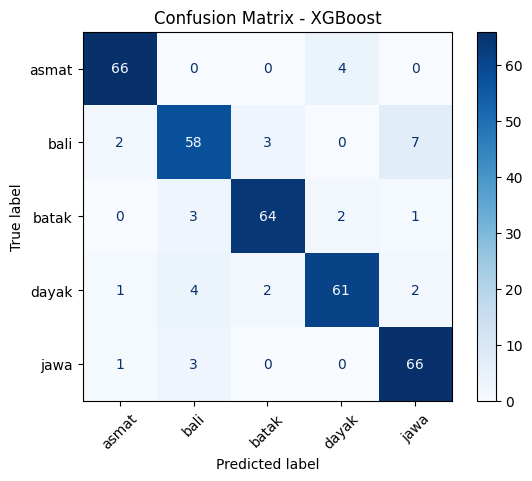

Accuracy class asmat: 0.9429
Accuracy class bali: 0.8286
Accuracy class batak: 0.9143
Accuracy class dayak: 0.8714
Accuracy class jawa: 0.9429
Wrong predictions saved: wrong_predictions_XGBoost_skenario4.csv
Total salah: 35

Suku paling banyak BENAR diprediksi:
label
asmat    66
jawa     66
batak    64
dayak    61
bali     58
Name: count, dtype: int64

Evaluating LightGBM on test set...
Accuracy: 0.8600 | F1 macro: 0.8600


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


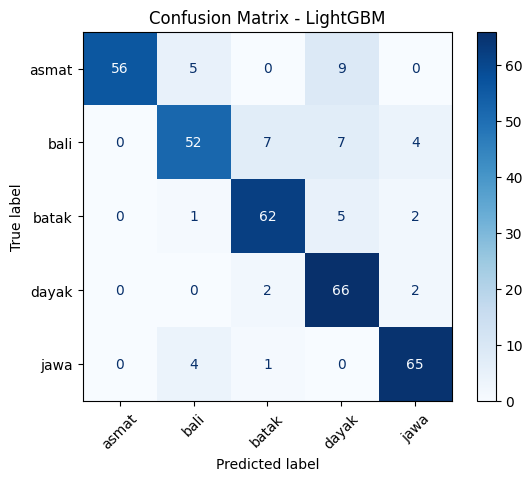

Accuracy class asmat: 0.8000
Accuracy class bali: 0.7429
Accuracy class batak: 0.8857
Accuracy class dayak: 0.9429
Accuracy class jawa: 0.9286
Wrong predictions saved: wrong_predictions_LightGBM_skenario4.csv
Total salah: 49

Suku paling banyak BENAR diprediksi:
label
dayak    66
jawa     65
batak    62
asmat    56
bali     52
Name: count, dtype: int64

Evaluating CatBoost on test set...
Accuracy: 0.9029 | F1 macro: 0.9026


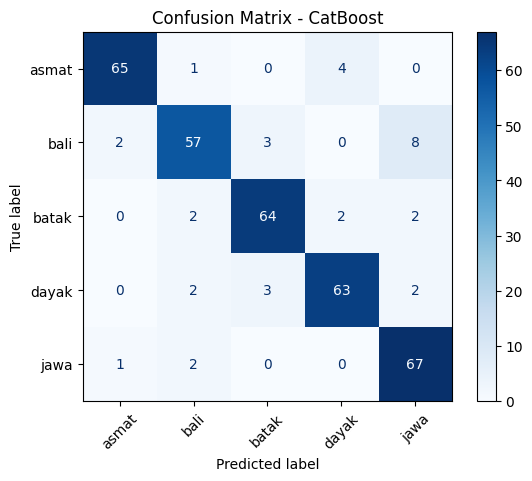

Accuracy class asmat: 0.9286
Accuracy class bali: 0.8143
Accuracy class batak: 0.9143
Accuracy class dayak: 0.9000
Accuracy class jawa: 0.9571
Wrong predictions saved: wrong_predictions_CatBoost_skenario4.csv
Total salah: 34

Suku paling banyak BENAR diprediksi:
label
jawa     67
asmat    65
batak    64
dayak    63
bali     57
Name: count, dtype: int64

Evaluating RandomForest on test set...
Accuracy: 0.8743 | F1 macro: 0.8732


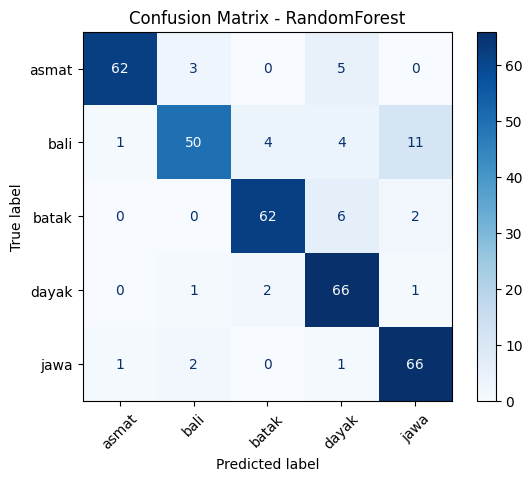

Accuracy class asmat: 0.8857
Accuracy class bali: 0.7143
Accuracy class batak: 0.8857
Accuracy class dayak: 0.9429
Accuracy class jawa: 0.9429
Wrong predictions saved: wrong_predictions_RandomForest_skenario4.csv
Total salah: 44

Suku paling banyak BENAR diprediksi:
label
jawa     66
dayak    66
asmat    62
batak    62
bali     50
Name: count, dtype: int64

Evaluating SVM (RBF) on test set...
Accuracy: 0.8886 | F1 macro: 0.8881


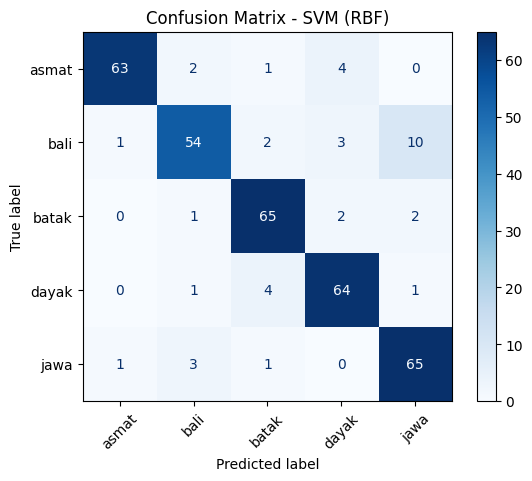

Accuracy class asmat: 0.9000
Accuracy class bali: 0.7714
Accuracy class batak: 0.9286
Accuracy class dayak: 0.9143
Accuracy class jawa: 0.9286
Wrong predictions saved: wrong_predictions_SVM (RBF)_skenario4.csv
Total salah: 39

Suku paling banyak BENAR diprediksi:
label
batak    65
jawa     65
dayak    64
asmat    63
bali     54
Name: count, dtype: int64


In [32]:
def normalize_id(x):
    # Remove '.jpg' extension and then convert to int
    return int(x.replace(".jpg", "").split("_")[-1])

results_4 = []

# Normalize id
test_df_4["id_norm"] = test_df_4["id"].apply(normalize_id)
test_label_df["id_norm"] = test_label_df["filename"].apply(normalize_id) # Fixed: Changed 'id' to 'filename'

for name, model in best_models_4.items():
    print(f"\nEvaluating {name} on test set...")

    # Predict
    pred = model.predict(X_test_lda_4).flatten()

    # Merge
    merged = pd.DataFrame({
        "id": test_df_4["id"],
        "pred": pred,
        "id_norm": test_df_4["id_norm"]
    }).merge(
        test_label_df[["filename", "label", "id_norm"]],
        on="id_norm",
        how="inner",
        suffixes=('_pred', '_true')
    )

    # Encode true label
    true_labels_encoded = label_encoder.transform(merged["label"])

    # Metrics
    acc = accuracy_score(true_labels_encoded, merged["pred"])
    f1 = f1_score(true_labels_encoded, merged["pred"], average="macro")
    print(f"Accuracy: {acc:.4f} | F1 macro: {f1:.4f}")

    # Confusion Matriks
    cm = confusion_matrix(true_labels_encoded, merged["pred"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    class_acc = cm.diagonal() / cm.sum(axis=1)
    for cls, acc_cls in zip(label_encoder.classes_, class_acc):
        print(f"Accuracy class {cls}: {acc_cls:.4f}")

    # Wrong predictions
    wrong_idx = np.where(true_labels_encoded != merged["pred"])[0]
    wrong_df = pd.DataFrame({
        "id_pred_file": merged.loc[wrong_idx, "id"],
        "id_true_file": merged.loc[wrong_idx, "filename"],
        "true_label": merged.loc[wrong_idx, "label"],
        "true_label_encoded": true_labels_encoded[wrong_idx],
        "predicted_label_encoded": merged.loc[wrong_idx, "pred"],
        "predicted_label": label_encoder.inverse_transform(merged.loc[wrong_idx, "pred"])
    })

    wrong_path = f"wrong_predictions_{name}_skenario4.csv"
    wrong_df.to_csv(wrong_path, index=False)
    print(f"Wrong predictions saved: {wrong_path}")
    print(f"Total salah: {len(wrong_df)}")

    # Correct predictions
    correct_idx = np.where(true_labels_encoded == merged["pred"])[0]
    correct_df = pd.DataFrame({
        "label": merged.loc[correct_idx, "label"]
    })
    correct_counts = correct_df["label"].value_counts()
    print("\nSuku paling banyak BENAR diprediksi:")
    print(correct_counts.head())

    # Save results
    results_4.append((name, acc, f1))

In [33]:
print("\n SUMMARY PERFORMANCE Skenario 4")
for name, acc, f1 in results_4:
    print(f"{name:15s} | ACC: {acc:.4f} | F1: {f1:.4f}")


 SUMMARY PERFORMANCE Skenario 4
XGBoost         | ACC: 0.9000 | F1: 0.8998
LightGBM        | ACC: 0.8600 | F1: 0.8600
CatBoost        | ACC: 0.9029 | F1: 0.9026
RandomForest    | ACC: 0.8743 | F1: 0.8732
SVM (RBF)       | ACC: 0.8886 | F1: 0.8881


# Perbandingan

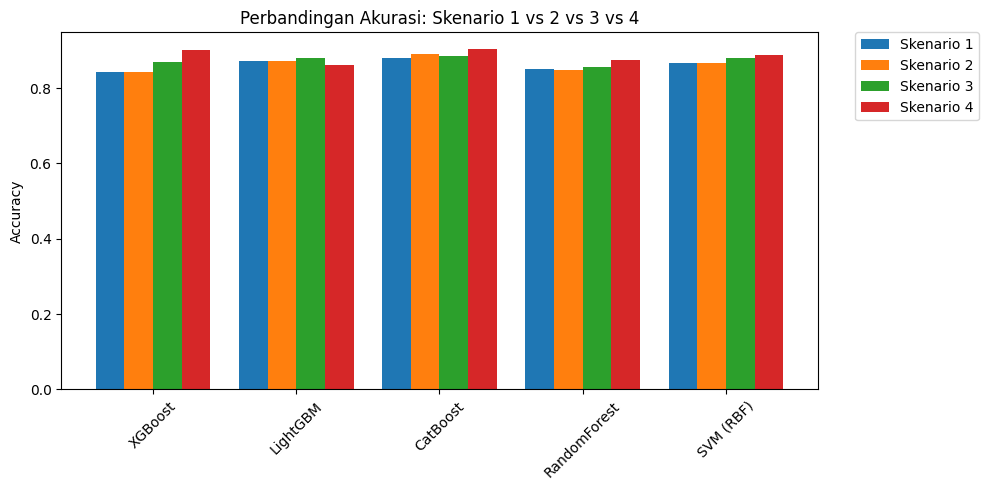

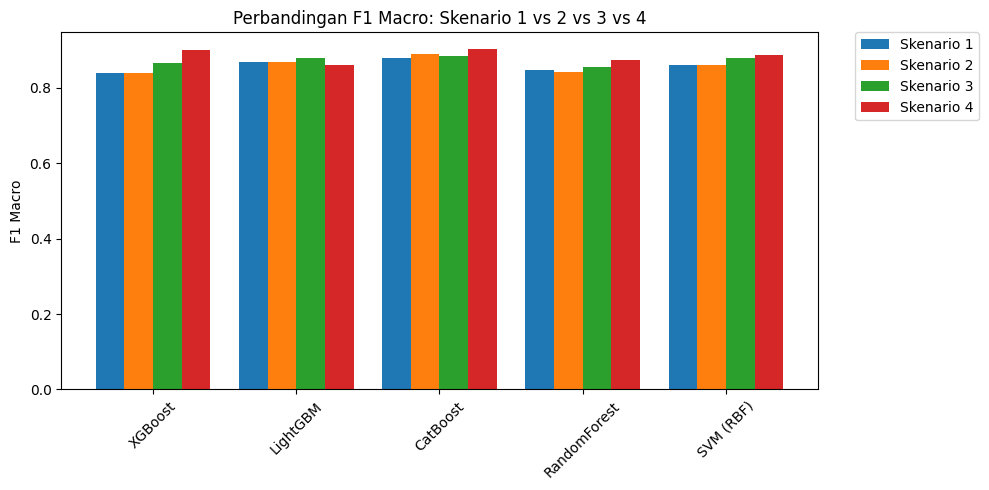

In [42]:
df1 = pd.DataFrame(results_1, columns=["Model", "Acc_S1", "F1_S1"])
df2 = pd.DataFrame(results_2, columns=["Model", "Acc_S2", "F1_S2"])
df3 = pd.DataFrame(results_3, columns=["Model", "Acc_S3", "F1_S3"])
df4 = pd.DataFrame(results_4, columns=["Model", "Acc_S4", "F1_S4"])

df = pd.merge(df1, df2, on="Model")
df = pd.merge(df, df3, on="Model")
df = pd.merge(df, df4, on="Model")
x = np.arange(len(df["Model"]))
width = 0.2

# Accuracy
plt.figure(figsize=(10,5))

# Plotting 4 batang
plt.bar(x - 1.5*width, df["Acc_S1"], width, label="Skenario 1")
plt.bar(x - 0.5*width, df["Acc_S2"], width, label="Skenario 2")
plt.bar(x + 0.5*width, df["Acc_S3"], width, label="Skenario 3")
plt.bar(x + 1.5*width, df["Acc_S4"], width, label="Skenario 4")

plt.xticks(x, df["Model"], rotation=45)
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi: Skenario 1 vs 2 vs 3 vs 4")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

#F1 Macro
plt.figure(figsize=(10,5))

# Plotting 4 batang
plt.bar(x - 1.5*width, df["F1_S1"], width, label="Skenario 1")
plt.bar(x - 0.5*width, df["F1_S2"], width, label="Skenario 2")
plt.bar(x + 0.5*width, df["F1_S3"], width, label="Skenario 3")
plt.bar(x + 1.5*width, df["F1_S4"], width, label="Skenario 4")

plt.xticks(x, df["Model"], rotation=45)
plt.ylabel("F1 Macro")
plt.title("Perbandingan F1 Macro: Skenario 1 vs 2 vs 3 vs 4")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()